In [1]:

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
#from google.colab import files
#uploaded = files.upload()

In [3]:
#import io
dataset = pd.read_csv('power_consumption.csv')
dataset.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [4]:
dataset['Year'] = pd.to_datetime(dataset['DateTime']).dt.year
dataset['Month'] = pd.to_datetime(dataset['DateTime']).dt.month
dataset['Day'] = pd.to_datetime(dataset['DateTime']).dt.day
dataset['Hour'] = pd.to_datetime(dataset['DateTime']).dt.hour
dataset['Minuite'] = pd.to_datetime(dataset['DateTime']).dt.minute

In [5]:
dataset.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Year,Month,Day,Hour,Minuite
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,2017,1,1,0,0
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,2017,1,1,0,10
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,2017,1,1,0,20
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,2017,1,1,0,30
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,2017,1,1,0,40


In [6]:
dataset =  dataset.drop(columns=['DateTime'])
dataset.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Year,Month,Day,Hour,Minuite
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,2017,1,1,0,0
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,2017,1,1,0,10
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,2017,1,1,0,20
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,2017,1,1,0,30
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,2017,1,1,0,40


In [7]:
dataset.shape

(52416, 13)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperature                52416 non-null  float64
 1   Humidity                   52416 non-null  float64
 2   Wind Speed                 52416 non-null  float64
 3   general diffuse flows      52416 non-null  float64
 4   diffuse flows              52416 non-null  float64
 5   Zone 1 Power Consumption   52416 non-null  float64
 6   Zone 2  Power Consumption  52416 non-null  float64
 7   Zone 3  Power Consumption  52416 non-null  float64
 8   Year                       52416 non-null  int64  
 9   Month                      52416 non-null  int64  
 10  Day                        52416 non-null  int64  
 11  Hour                       52416 non-null  int64  
 12  Minuite                    52416 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 5.2 MB


In [9]:
dataset.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Year,Month,Day,Hour,Minuite
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.0,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218,2017.0,6.510989,15.678571,11.500000,25.000000
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099,0.0,3.440642,8.771822,6.922253,17.078414
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070,2017.0,1.000000,1.000000,0.000000,0.000000
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630,2017.0,4.000000,8.000000,5.750000,10.000000
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470,2017.0,7.000000,16.000000,11.500000,25.000000
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420,2017.0,9.250000,23.000000,17.250000,40.000000
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360,2017.0,12.000000,31.000000,23.000000,50.000000


In [10]:
dataset.count()

Temperature                  52416
Humidity                     52416
Wind Speed                   52416
general diffuse flows        52416
diffuse flows                52416
Zone 1 Power Consumption     52416
Zone 2  Power Consumption    52416
Zone 3  Power Consumption    52416
Year                         52416
Month                        52416
Day                          52416
Hour                         52416
Minuite                      52416
dtype: int64

In [11]:
dataset.isnull()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Year,Month,Day,Hour,Minuite
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,False,False,False,False,False,False,False,False,False,False,False,False,False
52412,False,False,False,False,False,False,False,False,False,False,False,False,False
52413,False,False,False,False,False,False,False,False,False,False,False,False,False
52414,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
dataset.isnull().sum()

Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
Year                         0
Month                        0
Day                          0
Hour                         0
Minuite                      0
dtype: int64

In [13]:
dataset.nunique()

Temperature                   3437
Humidity                      4443
Wind Speed                     548
general diffuse flows        10504
diffuse flows                10449
Zone 1 Power Consumption     27709
Zone 2  Power Consumption    29621
Zone 3  Power Consumption    22838
Year                             1
Month                           12
Day                             31
Hour                            24
Minuite                          6
dtype: int64

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperature                52416 non-null  float64
 1   Humidity                   52416 non-null  float64
 2   Wind Speed                 52416 non-null  float64
 3   general diffuse flows      52416 non-null  float64
 4   diffuse flows              52416 non-null  float64
 5   Zone 1 Power Consumption   52416 non-null  float64
 6   Zone 2  Power Consumption  52416 non-null  float64
 7   Zone 3  Power Consumption  52416 non-null  float64
 8   Year                       52416 non-null  int64  
 9   Month                      52416 non-null  int64  
 10  Day                        52416 non-null  int64  
 11  Hour                       52416 non-null  int64  
 12  Minuite                    52416 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 5.2 MB


In [15]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,52416.0,18.810024,5.815476,3.247000,14.410000,18.780000,22.890000,40.01000
Humidity,52416.0,68.259518,15.551177,11.340000,58.310000,69.860000,81.400000,94.80000
Wind Speed,52416.0,1.959489,2.348862,0.050000,0.078000,0.086000,4.915000,6.48300
general diffuse flows,52416.0,182.696614,264.400960,0.004000,0.062000,5.035500,319.600000,1163.00000
diffuse flows,52416.0,75.028022,124.210949,0.011000,0.122000,4.456000,101.000000,936.00000
Zone 1 Power Consumption,52416.0,32344.970564,7130.562564,13895.696200,26310.668692,32265.920340,37309.018185,52204.39512
Zone 2 Power Consumption,52416.0,21042.509082,5201.465892,8560.081466,16980.766032,20823.168405,24713.717520,37408.86076
Zone 3 Power Consumption,52416.0,17835.406218,6622.165099,5935.174070,13129.326630,16415.117470,21624.100420,47598.32636
Year,52416.0,2017.000000,0.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.00000
Month,52416.0,6.510989,3.440642,1.000000,4.000000,7.000000,9.250000,12.00000


In [16]:
dataset.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Year,Month,Day,Hour,Minuite
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,2017,1,1,0,0
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,2017,1,1,0,10
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,2017,1,1,0,20
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,2017,1,1,0,30
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,2017,1,1,0,40


In [17]:
total_power_consumtion = dataset['Zone 1 Power Consumption'] + dataset['Zone 2  Power Consumption'] + dataset['Zone 3  Power Consumption']
total_power_consumtion 

0        70425.53544
1        69320.84387
2        67803.22193
3        65489.23209
4        63650.44627
            ...     
52411    72798.08659
52412    70983.80786
52413    68675.04965
52414    67163.01682
52415    65750.53976
Length: 52416, dtype: float64

In [18]:
dataset['Total power'] = total_power_consumtion

In [19]:
dataset.columns


Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption', 'Year',
       'Month', 'Day', 'Hour', 'Minuite', 'Total power'],
      dtype='object')

In [20]:
dataset = dataset.drop(columns=['Zone 1 Power Consumption', 'Zone 2  Power Consumption','Zone 3  Power Consumption'])
dataset.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Year,Month,Day,Hour,Minuite,Total power
0,6.559,73.8,0.083,0.051,0.119,2017,1,1,0,0,70425.53544
1,6.414,74.5,0.083,0.070,0.085,2017,1,1,0,10,69320.84387
2,6.313,74.5,0.080,0.062,0.100,2017,1,1,0,20,67803.22193
3,6.121,75.0,0.083,0.091,0.096,2017,1,1,0,30,65489.23209
4,5.921,75.7,0.081,0.048,0.085,2017,1,1,0,40,63650.44627


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Temperature            52416 non-null  float64
 1   Humidity               52416 non-null  float64
 2   Wind Speed             52416 non-null  float64
 3   general diffuse flows  52416 non-null  float64
 4   diffuse flows          52416 non-null  float64
 5   Year                   52416 non-null  int64  
 6   Month                  52416 non-null  int64  
 7   Day                    52416 non-null  int64  
 8   Hour                   52416 non-null  int64  
 9   Minuite                52416 non-null  int64  
 10  Total power            52416 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 4.4 MB


In [22]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
# X = preprocessing.normalize(X)

In [23]:
# Split the data for train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=32)

AccDict={}


In [24]:
#linear regression
from sklearn.linear_model import LinearRegression
cv = KFold(n_splits=5, random_state=114, shuffle=True)
avg=[]
for train_index, test_index in cv.split(X):
    x_train, x_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    reg = LinearRegression().fit(x_train, y_train)
    avg.append(reg.score(x_test, y_test))

lscore = round(sum(avg)/5.0,4)
li = {'Linear Regression':lscore}
AccDict.update(li)
print(f"5 fold R2 score is {lscore}")



5 fold R2 score is 0.5321


In [25]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

cv = KFold(n_splits=5, random_state=114, shuffle=True)
avg=[]
for train_index, test_index in cv.split(X):
    x_train, x_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    regr = ElasticNet(random_state=0)
    regr.fit(x_train, y_train)
    avg.append(regr.score(x_test, y_test))




escore = round(sum(avg)/5.0,4)
er = {'ElasticNet Regression':escore}
AccDict.update(er)
print(f"5 fold R2 score is {escore}")


5 fold R2 score is 0.5318


In [26]:
from sklearn.linear_model import Ridge
cv = KFold(n_splits=5, random_state=114, shuffle=True)
avg=[]
for train_index, test_index in cv.split(X):
    x_train, x_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    r = Ridge(alpha=0.0000001,solver='lsqr').fit(x_train, y_train)
    avg.append(r.score(x_test,y_test))



rscore = round(sum(avg)/5.0,4)
rl = {'Ridge Regression':lscore}
AccDict.update(rl)
print(f"5 fold R2 score is {rscore}")





5 fold R2 score is 0.5321


In [27]:
from sklearn import linear_model
cv = KFold(n_splits=5, random_state=114, shuffle=True)
avg=[]
for train_index, test_index in cv.split(X):
    x_train, x_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    r = linear_model.Lasso(alpha=0.1).fit(x_train, y_train)
    avg.append(r.score(x_test,y_test))



lrscore = round(sum(avg)/5.0,4)
Lr = {'Lasso Regression':lrscore}
AccDict.update(Lr)
print(f"5 fold R2 score is {lrscore}")




5 fold R2 score is 0.5321


Text(0, 0.5, 'score rate')

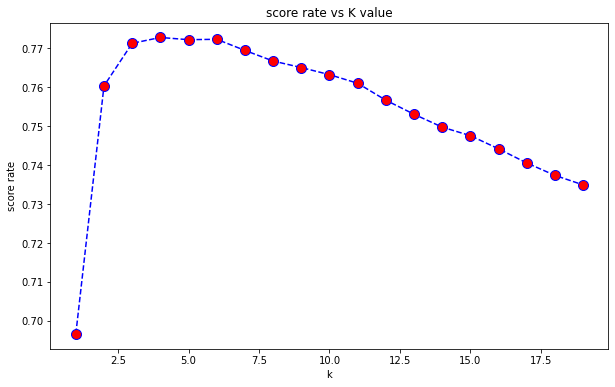

In [28]:
from sklearn.neighbors import KNeighborsRegressor

score=[]
for i in range(1,20):
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh = neigh.fit(x_train, y_train)
    # knn = KNeighborsRegressor(n_neighbors=i)
    # knn.fit(x_train,y_train)
    # pred1=knn.predict(x_test)
    score.append(neigh.score(x_test,y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,20),score,color='blue',linestyle='dashed',marker = 'o',markerfacecolor='red',markersize=10)
plt.title('score rate vs K value')
plt.xlabel('k')
plt.ylabel('score rate')

In [29]:
from sklearn.neighbors import KNeighborsRegressor

cv = KFold(n_splits=5, random_state=114, shuffle=True)
avg=[]
for train_index, test_index in cv.split(X):
    x_train, x_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    neigh = KNeighborsRegressor(n_neighbors=4)
    neigh = neigh.fit(x_train, y_train)
    avg.append(neigh.score(x_test,y_test))



knnscore = round(sum(avg)/5.0,4)
kn = {'KNN Regression':knnscore}
AccDict.update(kn)
print(f"5 fold R2 score is {knnscore}")





5 fold R2 score is 0.7721


In [30]:
from sklearn import tree

cv = KFold(n_splits=5, random_state=114, shuffle=True)
avg=[]
for train_index, test_index in cv.split(X):
    x_train, x_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    clf = tree.DecisionTreeRegressor(random_state=0)
    clf = clf.fit(x_train, y_train)
    avg.append(clf.score(x_test,y_test))


dscore = round(sum(avg)/5.0,4)
dt = {'Decision Tree Regression':dscore}
AccDict.update(dt)
print(f"5 fold R2 score is {dscore}")




5 fold R2 score is 0.9782


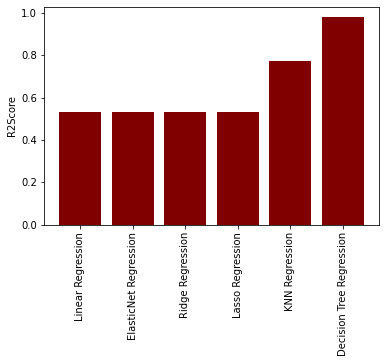

In [31]:
classifier = list(AccDict.keys())
r2score = list(AccDict.values())

fig, ax = plt.subplots()
ax.bar(classifier, r2score,color ='maroon')
ax.set_xticklabels(classifier,rotation=90)
ax.set_ylabel("R2Score")
plt.show()

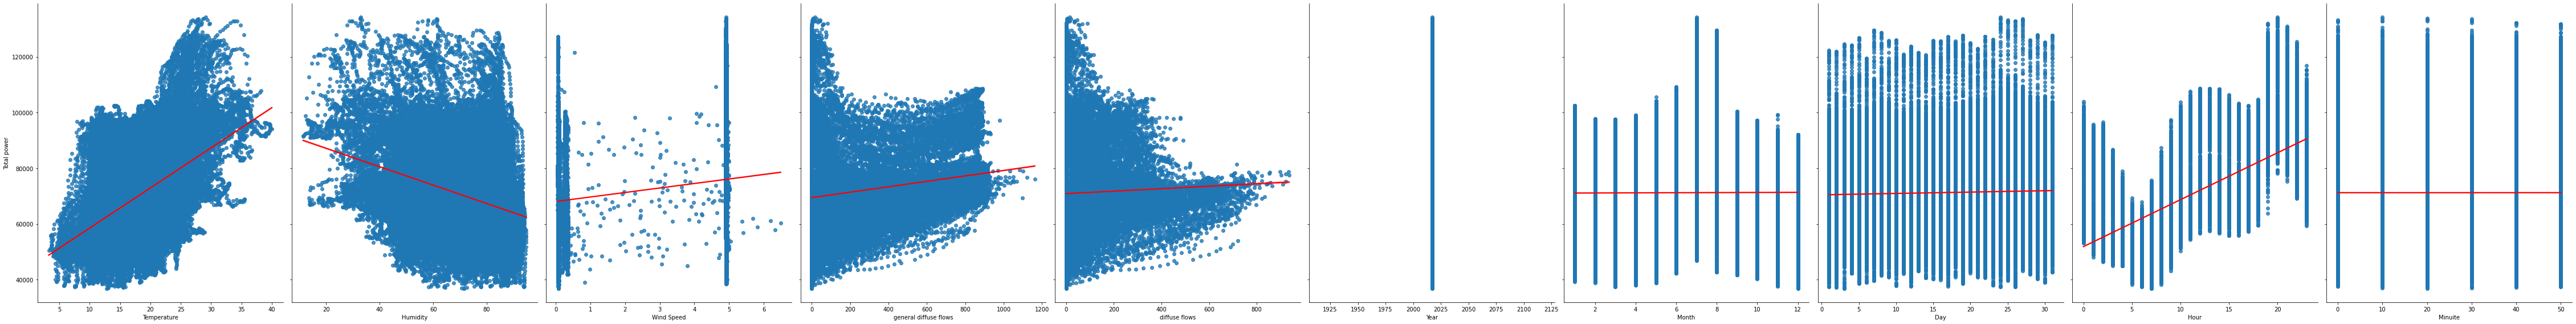

In [38]:
import seaborn as sns
sns.pairplot(dataset, x_vars=["Temperature", "Humidity","Wind Speed","general diffuse flows","diffuse flows","Year","Month","Day","Hour","Minuite"], y_vars=["Total power"],
             palette ='coolwarm', height=8, aspect=.8, kind="reg",plot_kws={'line_kws':{'color':'red'}});

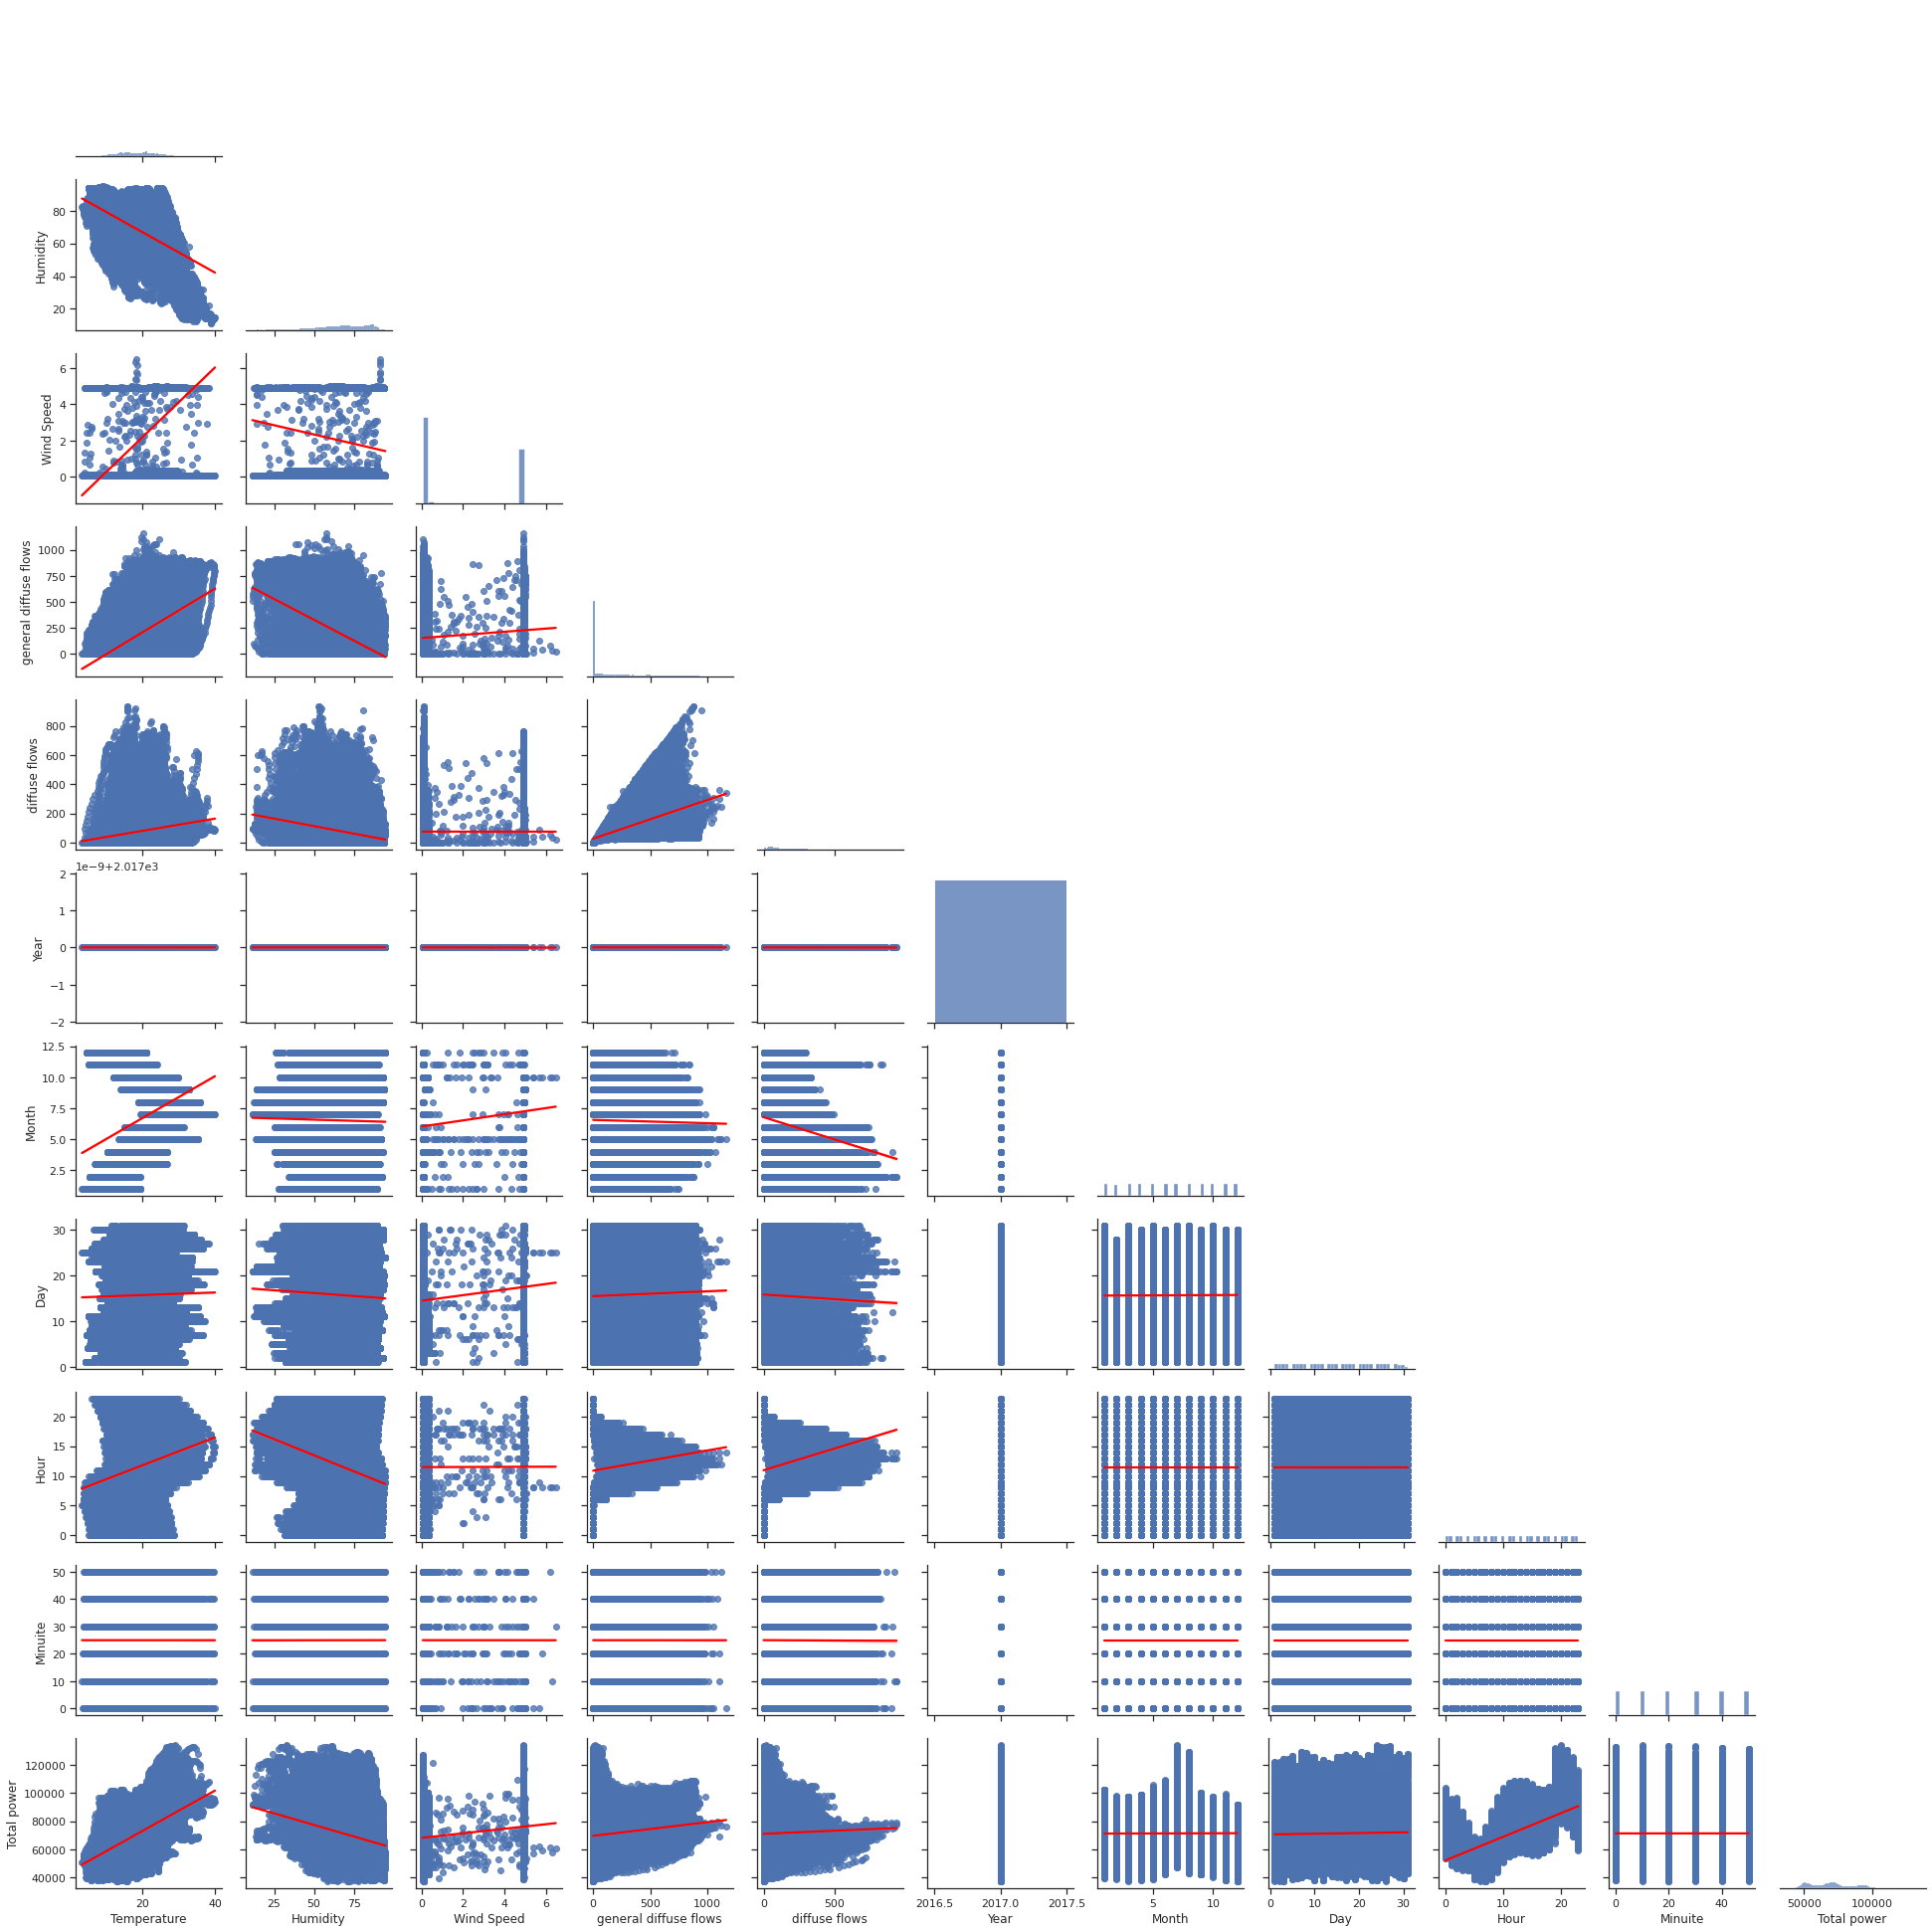

In [39]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(dataset, kind="reg", corner=True, plot_kws={'line_kws':{'color':'red'}})
plt.show()